# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
# Importing required packages.
import pandas as pd
import numpy as np

df = pd.read_csv('human_body_temperature.csv')
# Checking the dataset.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [2]:
#Checking for any missing values in the columns.
df.info()
# No missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [5]:
# standardizing the temperature column of the dataset.
body_temp=df['temperature']
body_temp_standardized=(body_temp-body_temp.mean())/body_temp.std()

In [5]:
body_temp_standardized.head()



0    1.433161
1    0.205637
2   -0.612713
3    1.296769
4   -0.339930
Name: temperature, dtype: float64

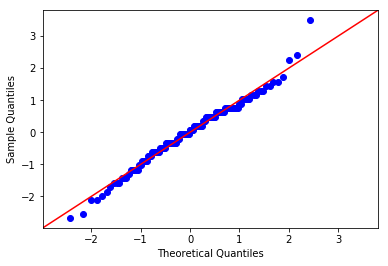

In [6]:
# Plotting the qqplot in order to check the normality of body temperature.
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
fig=sm.qqplot(body_temp_standardized,fit=True,line='45')
plt.show()

### The above QQ-plot shows that the data is approximately Normally distributed.

In [7]:
# Applying  Shapiro wilk normaility test to the body temperature data.
from scipy import stats
sw_statistics,pvalue=stats.shapiro(body_temp)
print('The p value corresponding to the Shapirow wilk statistics is:',pvalue)


The p value corresponding to the Shapirow wilk statistics is: 0.2331680953502655


### Since the p value of the Shapiro wilk statistics .233 >.05 , the Null hypothesis of body Temperature being normally distributed can't be rejected at 5% level of significance.

## Ans 1: Thus from the QQ plot & Shapiro wilk test, we can conclude that body temperature data is normally distributed.

### There are 130 body temperature observations of different individuals . Thus this dataset is reasonably large for CLT to hold . Though the sampling is done without replacement,  the observations  seem to come from  an infinitely large population  hence we can treat the samples as iid.

## Ans 2: The dataset is reasonably large and has independent observations.
 


### Define  H0: The population temperature mean = 98.6 F
###              H1: The population temperature mean != 98.6 F

In [6]:
# Applying the bootstrap method.
# Making the dataset sample mean to be 98.6 F.
body_temp_shifted= body_temp-body_temp.mean()+98.6

In [7]:
# Computing bootstrap samples for the shifted temp dataset
bs_replicates=[]
for i in range(100000):
    k= np.random.choice(body_temp_shifted,size=body_temp_shifted.size).mean()
    bs_replicates.append(k)


In [8]:
# Computing the 2.5 & 97.5 percentile values for the bootstraped sample means or 95% confidence interval
#for the shifted temp dataset
conf_interval=np.percentile(bs_replicates,[2.5,97.5])
print('The bootstrap 95% confidence interval is: ',np.around(conf_interval,2))
print('The mean of the bootstraped samples is: ',round(np.mean(bs_replicates),2))

The bootstrap 95% confidence interval is:  [98.47 98.73]
The mean of the bootstraped samples is:  98.6


In [9]:
print('The mean of the given sample is: ',round(body_temp.mean(),2))

The mean of the given sample is:  98.25


###  Since the given temperature dataset has the sample mean of  98.25 ,which is outside the 95% Confidence Interval (98.47    98.72) of bootstraped sample means, We can reject the Null Hypothesis that population mean = 98.6 F





### As we are trying to assess hypothesis about population mean , using the information provided by a lone sample, we would be proceeding with the One Sample test.
### Since the population variance of the temperature dataset is not known, Z statistics is not appropriate here.And as the sample is drawn from a normally distributed population,we will proceed with the t statistics test here.

In [11]:
# Proceeding with the one sample t test
from scipy import stats
t,pvalue=stats.ttest_1samp(body_temp,98.6)
print('The p value corresponding to the t statistic is: ',pvalue)


The p value corresponding to the t statistic is:  2.4106320415561276e-07


In [12]:
# Proceeding with the one sample Z test
import statsmodels.stats.weightstats as sm1
z,pvalue = sm1.ztest(body_temp,None,98.6)
print('The p value corresponding to the z statistic is: ',pvalue)

The p value corresponding to the z statistic is:  4.9021570141012155e-08


## Ans 3: Since the p values associated with both  t  & z statistics is essentially 0, We reject the Null Hypothesis that the population mean temperature= 98.6 F. Further the p values for both t & z statistics are essentially same because the sample size is large. The bootstrap method also corroborates this finding.

In [31]:
# Drawing a sample size of 10 from the dataset.
k1= np.random.choice(body_temp,size=10)

In [32]:
# Proceeding with the t test
from scipy import stats
t,pvalue=stats.ttest_1samp(k1,98.6)
print('The p value corresponding to the t statistic is: ',pvalue)

The p value corresponding to the t statistic is:  0.16319978991894657


In [22]:
import statsmodels.stats.weightstats as sm1
z,pvalue = sm1.ztest(k1,None,98.6)
print('The p value corresponding to the z statistic is: ',pvalue)

The p value corresponding to the z statistic is:  0.037530378210589785


## Ans 4: The p values associated with t test and  z test are .1632 & .0375 respectively. Thus the t test does not reject the Null Hypothesis of mean population temperature being 98.6,  while z test does at 5% significance level. Thus if sample size is small both these tests can give different results. But since the sample size is 10 which is very small, t test is appropriate here. Also z test  can only be applied when the population variance is known, unlike in this case.

### When a person's body temperature is outside 95% confidence interval around the population average , Then we can assume that  his/her body temp to be abnormal.


In [33]:
# Computing the 95% Confidence Interval around the population average.
k2= np.random.choice(body_temp,size=100000)
print('The population average of the bootstraped sample values is: ',round(k2.mean(),2))


The population average of the bootstraped sample values is:  98.25


In [34]:
conf_Int_b=np.percentile(k2,[2.5,97.5])# 95% Confidence Interval around the population average.
print('The 95% confidence interval of bootstraped sample data is: ',conf_Int_b)
margin_error_b= (conf_Int_b[1]-conf_Int_b[0])/2
print('The bootstrap margin of error is: ',round(margin_error_b,2))

The 95% confidence interval of bootstraped sample data is:  [96.7 99.5]
The bootstrap margin of error is:  1.4


In [39]:
# Computing the 95% t-statistics confidence interval for the unknown population mean.
t_conf=stats.t.interval(0.95, len(body_temp)-1, loc=np.mean(body_temp), scale=(stats.sem(body_temp)))
print('The 95% confidence interval of population mean is: ',t_conf)
margin_error_t=(t_conf[1]-t_conf[0])/2
print('The margin of error for  population mean is: ',round(margin_error_t,2))

The 95% confidence interval of population mean is:  (98.12200290560804, 98.37645863285351)
The margin of error for  population mean is:  0.13


## Ans 5: From above results we have :
### According to Bootstrap simulations
### a) The person's temperature would be considered abnormal,if it doesn't fall in the  interval  (96.7 F , 99.5 F)
### b) The margin of error in this case is 1.4 F
### According to t statistics
### a) The person's temperature would be considered abnormal,if it doesn't fall in the  interval  (98.12 F , 98.37 F)
### b) The margin of error in this case is 0.13 F




In [32]:
# Segregating the Male & Female data
Male=df.loc[df['gender']=='M']
Female=df.loc[df['gender']=='F']

In [33]:
# Applying  Shapiro wilk normaility test to the male temperature data.
sw_statistics_m,pvalue_m = stats.shapiro(Male['temperature'])
print('The p value corresponding to the Shapirow wilk statistics is:',pvalue_m)

The p value corresponding to the Shapirow wilk statistics is: 0.8545167446136475


In [34]:
# Applying  Shapiro wilk normaility test to the Female temperature data.
sw_statistics_m,pvalue_f = stats.shapiro(Female['temperature'])
print('The p value corresponding to the Shapirow wilk statistics is:',pvalue_f)

The p value corresponding to the Shapirow wilk statistics is: 0.09016574919223785


### From the above results of Shapiro wilk statistics, we can see that both male and female temperature data are normally distributed and each has a sample size of 64 observations. Hence we would be using the t test for comparing their population mean temperatures.


In [37]:
# Checking for the male & female temperature data for equal variance by F test
F_Statistics=np.var(Male['temperature'], ddof=1)/np.var(Female['temperature'], ddof=1)
f_RV = stats.f(len(Male['temperature'])-1,len(Female['temperature'])-1)
f_critical1 = f_RV.ppf(0.025)# Computes critical value corresponding to the 2.5 percentile
f_critical2 = f_RV.ppf(0.975)# Computes critical value corresponding to the 97.5 percentile
print('The value of the F statistics is: ',round(F_Statistics,4))
print('The critical values corresponding to the F Statistics are: (',f_critical1,' ',f_critical2,')')

The value of the F statistics is:  0.8833
The critical values corresponding to the F Statistics are: ( 0.6099475769056641   1.639485158828104 )


### Since the value of the F_statistics lies between 95% critical values, f_critical1 & f_critical2 , both male & female datasets  have same population variances, we can now apply two sample t test to check for differences of their respective population means.



In [38]:
# Applying 2 sample t test to the male and female sample data.
t_statistics,Pvalue_M_F = stats.ttest_ind(Male['temperature'],Female['temperature'])
print('The p value corresponding to the t statistics is: ', Pvalue_M_F)

The p value corresponding to the t statistics is:  0.02393188312239561


## Ans 6: The p value correspnding to 2 sample t test is .024, hence we can reject the Null hypothesis of equal population means for male and female temperature datasets at 5% level of significance. 



## Conclusion: From the given temperature dataset, we have deduced that we can reject the null hypothesis of population mean = 98.6 F . This conclusion has been corroborated by both bootstrap as well as one sample t statistics test. Further using 2 sample t statistics (as both male & female sample datasets are reasonably large, normally distributed and have same variance) we  have concluded that male and female mean population temperatures are different, which is expected as both have different physiologies